# 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

## 데이터 준비

In [1]:
import pandas as pd
print("슝=3")

슝=3


## 프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!

### 데이터 가져오기
#### 모델에 입력할 데이터 X 준비하기
#### 모델에 예측할 데이터 y 준비하기

In [2]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
diabetes=load_diabetes()

In [3]:
df_x=diabetes.data
df_y=diabetes.target

import numpy as np
df_x = np.array(df_x)
df_y = np.array(df_y)
print(df_x)
print(df_y)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 

In [4]:
print(df_x.shape)
print(df_y.shape)

(442, 10)
(442,)


### train 데이터와 test 데이터로 분리하기

In [5]:
import pandas as pd
print(pd.__version__)

1.3.3


In [6]:
print(dir(diabetes))

['DESCR', 'data', 'data_filename', 'data_module', 'feature_names', 'frame', 'target', 'target_filename']


In [7]:
X_train, X_test, y_train, y_test = train_test_split(df_x, 
                                                    df_y, 
                                                    test_size=0.8, 
                                                    random_state=7)

print('X_train 개수: ', len(X_train),', X_test 개수: ', len(X_test))

X_train 개수:  88 , X_test 개수:  354


In [8]:
X_train.shape, y_train.shape

((88, 10), (88,))

In [9]:
X_test.shape, y_test.shape

((354, 10), (354,))

In [10]:
y_train, y_test

(array([270.,  72., 144., 152., 179., 182., 142., 222., 235., 200.,  49.,
        210., 274., 135.,  53.,  72.,  60.,  84.,  87., 174., 135., 168.,
        185., 104.,  54., 126.,  77.,  51., 212.,  88., 190., 248.,  90.,
        101., 200., 270.,  91.,  48.,  88., 140.,  91.,  63.,  95., 183.,
        122., 113., 280.,  39., 252.,  39., 136., 332.,  79., 243., 246.,
        185., 292., 144., 192., 178., 259.,  94., 138., 303., 180.,  42.,
        151.,  63.,  88., 160., 220., 118., 214.,  61., 233., 139., 202.,
        245., 242., 101., 148., 198., 140.,  70.,  97., 202.,  72., 127.]),
 array([ 71.,  81.,  61., 173., 109.,  66.,  72., 111.,  63., 151., 168.,
        202., 229.,  52., 252., 219., 116., 272.,  45., 187., 257., 132.,
        128., 198., 225.,  68., 281., 113., 163., 131., 109., 268., 178.,
        111., 143., 129.,  94.,  59., 259., 225.,  66., 179.,  59., 242.,
        196.,  93., 209., 141., 102., 102.,  72.,  73.,  58., 156., 143.,
        201., 259., 158., 214.,  52.

### 모델 준비하기

In [11]:
W= np.random.rand(10)
b = np.random.rand()
print("슝=3")

슝=3


In [12]:
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions
print("슝=3")

슝=3


In [13]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse
print("슝=3")

슝=3


### 손실함수 loss 정의하기

In [14]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [15]:
c=loss(df_x, W, b, df_y)
c

28916.495748063717

### 기울기를 구하는 gradient 함수 구현하기

In [16]:
def gradient(X, W, b, y):
    N = len(W)
    y_pred = model(X, W, b)
    dW = 1/N * 2 * X.T.dot(y_pred - y)
    db = 2 * (y_pred - y).mean()
    return dW, db, y_pred
print("슝=3")

슝=3


In [17]:
dW, db, y_pred= gradient(df_x, W, b, df_y)
print("dW:", dW)
print("db:", db)
print(y_pred)

dW: [ -60.45035231  -13.77158938 -189.6108428  -142.5543014   -68.18240108
  -55.95155231  127.7284408  -139.02314694 -182.82048025 -123.47709232]
db: -303.2910093429569
[0.49682865 0.37086899 0.50571236 0.37917867 0.46614732 0.20472713
 0.33202845 0.73929937 0.49109792 0.38137662 0.17431241 0.42185371
 0.44404478 0.51823122 0.49315528 0.65040845 0.59642147 0.67507605
 0.33298944 0.3823313  0.31582075 0.32544039 0.34674788 0.71961089
 0.32280201 0.36928786 0.18822902 0.37682166 0.3691829  0.60537955
 0.37799963 0.28541501 0.51810765 0.44410106 0.2904339  0.61247444
 0.55755603 0.39082595 0.76260636 0.45033227 0.65034794 0.14697994
 0.33509241 0.4876374  0.54286612 0.50444337 0.27872104 0.16744623
 0.54009392 0.45032327 0.44476303 0.51293048 0.46683609 0.55227689
 0.45858481 0.37555579 0.37419899 0.21755625 0.56084351 0.68922301
 0.24335828 0.37850908 0.38588539 0.36383502 0.43120763 0.54121249
 0.4427141  0.51169301 0.4496152  0.35004252 0.45253918 0.654389
 0.72790641 0.56330453 0.638

### 하이퍼 파라미터인 학습률 설정하기

In [18]:
LEARNING_RATE = 0.05

### 모델 학습하기

In [19]:
losses = []

for i in range(1, 1001):
    dW, db, y_pred = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 7808.4791
Iteration 20 : Loss 5148.8421
Iteration 30 : Loss 4636.2554
Iteration 40 : Loss 4408.5794
Iteration 50 : Loss 4236.1787
Iteration 60 : Loss 4088.1608
Iteration 70 : Loss 3958.2218
Iteration 80 : Loss 3843.4314
Iteration 90 : Loss 3741.5978
Iteration 100 : Loss 3650.8963
Iteration 110 : Loss 3569.7821
Iteration 120 : Loss 3496.9431
Iteration 130 : Loss 3431.2637
Iteration 140 : Loss 3371.7945
Iteration 150 : Loss 3317.7268
Iteration 160 : Loss 3268.3711
Iteration 170 : Loss 3223.1388
Iteration 180 : Loss 3181.5269
Iteration 190 : Loss 3143.1047
Iteration 200 : Loss 3107.5031
Iteration 210 : Loss 3074.4051
Iteration 220 : Loss 3043.5381
Iteration 230 : Loss 3014.6668
Iteration 240 : Loss 2987.5882
Iteration 250 : Loss 2962.1263
Iteration 260 : Loss 2938.1284
Iteration 270 : Loss 2915.4613
Iteration 280 : Loss 2894.0089
Iteration 290 : Loss 2873.6692
Iteration 300 : Loss 2854.3529
Iteration 310 : Loss 2835.9809
Iteration 320 : Loss 2818.4833
Iteration 330 : L

### test 데이터에 대한 성능 확인하기

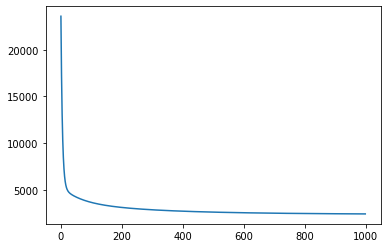

In [20]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [21]:
W, b

(array([  47.49190281, -213.12334284,  344.72343924,  342.73455382,
         -64.63732905,  -97.94459176, -341.76623108,  106.78447533,
         460.09034787,   -0.88094202]),
 152.6662968114572)

In [22]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

3117.459665996647

In [23]:
import matplotlib.pyplot as plt
# 실행한 브라우저에서 바로 그림을 볼 수 있게 해줌
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' # 더 높은 해상도로 출력한다.
print("슝=3")

슝=3


### 정답 데이터와 예측한 데이터 시각화하기

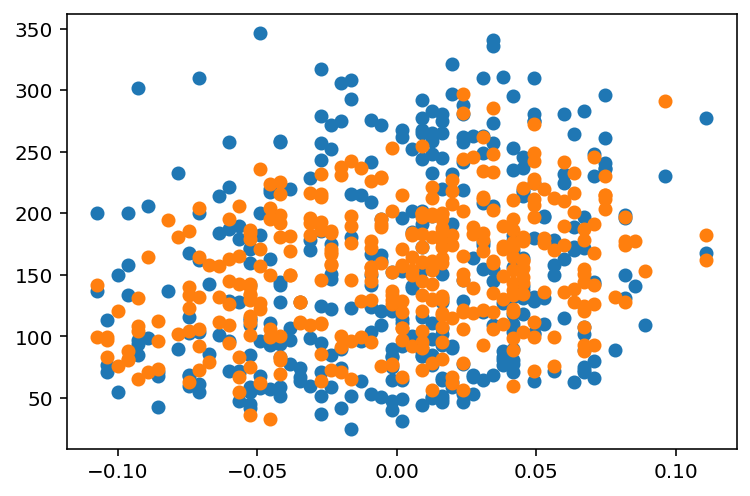

In [24]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

In [25]:
class MultiLinear:
  def __init__(self,learning_rate=0.001):
    self.w=None #모델의 weight 벡터 self.w=(w_1,w_2)
    self.b=None #모델의 bias
    self.lr=learning_rate #모델의 학습률
    self.losses=[] #매 에포크마다 손실을 저장하기 위한 리스트
    self.weight_history=[] #매 에포크마다 계산된 weight를 저장하기 위한 리스트
    self.bias_history=[] #매 에포크마다 계산된 bias를 저장하기 위한 리스트

  def forward(self,x):
    y_pred=np.sum(x*self.w)+self.b #np.sum함수는 인자로 받은 numpy배열의 모든 원소의 합을 return합니다.
    return y_pred

  def loss(self,x,y):
    y_pred=self.forward(x)
    return (y_pred-y)**2

  def gradient(self,x,y):
    y_pred=self.forward(x)
    w_grad=2*x*(y_pred-y)
    b_grad=2*(y_pred-y)

    return w_grad,b_grad

  def fit(self,df_x,df_y,epochs=20):
    self.w=np.ones(df_x.shape[1]) #모델의 weight들을 전부 1로 초기화
    self.b=0 #모델의 bias를 0으로 초기화
    for epoch in range(epochs):
      l=0 #계산할 손실값
      w_grad=np.zeros(df_x.shape[1]) #weight의 기울기를 누적할 numpy배열
      b_grad=0  #bias의 기울기를 누적할 변수

      for x,y in zip(df_x,df_y):
        l+=self.loss(x,y)
        w_i,b_i=self.gradient(x,y)

        w_grad+=w_i #weight누적
        b_grad+=b_i #bias누적

      self.w-=self.lr*(w_grad/len(df_y)) #weight 업데이트
      self.b-=self.lr*(b_grad/len(df_y)) #bias 업데이트
 
      print(f'epoch ({epoch+1}) ===> loss : {l/len(df_y):.5f}')
      self.losses.append(l/len(df_y)) #손실값 저장
      self.weight_history.append(self.w) #weight 배열 저장
      self.bias_history.append(self.b) #bias값 저장

In [26]:
y_pred

array([277.72980715, 109.63746771, 159.14791744, 108.81537017,
       117.43031796, 152.25573262, 122.41035141, 195.11403301,
       180.33971919, 148.14935128,  92.83494316, 148.68003888,
       220.81881247, 107.26647977,  95.49758524,  55.36617287,
        60.34503146, 172.42911363, 100.14859332, 170.64746771,
       137.86720994, 121.07749373, 141.98291061, 107.10527732,
       104.05208601, 184.45415583,  85.7333839 ,  84.72619073,
       195.17814483, 135.60170715, 175.69190288, 209.26720773,
       132.96415644, 114.72736402, 124.2498343 , 227.89057698,
       175.29743254, 177.82815603, 127.1851046 , 125.89267374,
       103.98454133, 108.3602619 , 141.36099982, 127.92620937,
       171.33251142, 153.95672941, 225.46867878,  47.29477357,
       234.50246074,  75.48124226, 141.13683492, 214.13260286,
       125.81993179, 264.73906561, 143.81348211, 164.28986941,
       200.99267767, 124.15803541, 210.44341203, 136.46076364,
       219.61094155, 156.52336463,  89.60073167, 260.28

In [27]:
y_test.shape

(354,)

In [28]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(y_test, y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [354, 88]

# 프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?
### 데이터 가져오기

In [ ]:
import numpy as np
import pandas as pd
path = '/aiffel/aiffel/EX/bike-sharing-demand/train.csv'
data =pd.read_csv(path)
print(data)

### datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

In [ ]:
data['datetime']

In [ ]:
pd.to_datetime(data['datetime'])

In [ ]:
data['날짜_datetime']=pd.to_datetime(data['datetime'])

In [ ]:
data['날짜_연도']=data['날짜_datetime'].dt.year
data['날짜_월']=data['날짜_datetime'].dt.month
data['날짜_일']=data['날짜_datetime'].dt.date
data['날짜_시']=data['날짜_datetime'].dt.hour
data['날짜_분']=data['날짜_datetime'].dt.minute
data['날짜_초']=data['날짜_datetime'].dt.second

In [ ]:
data['날짜_datetime']

### year, month, day, hour, minute, second 데이터 개수 시각화하기

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

plt.subplot(321)
sns.countplot(x=data['날짜_연도'], data=data['count'])
plt.title("년별 팁을 준 횟수")
plt.subplot(322)
sns.countplot(x=data['날짜_월'], data=data['count'])
plt.title("월별 팁을 준 횟수")
plt.subplot(323)
sns.countplot(x=data['날짜_일'], data=data['count'])
plt.title("날짜별 팁을 준 횟수")
plt.subplot(324)
sns.countplot(x=data['날짜_시'], data=data['count'])
plt.title("시별 팁을 준 횟수")
plt.subplot(325)
sns.countplot(x=data['날짜_분'], data=data['count'])
plt.title("분별 팁을 준 횟수")
plt.subplot(326)
sns.countplot(x=data['날짜_초'], data=data['count'])
plt.title("초별 팁을 준 횟수")

plt.show()

### X, y 컬럼 선택 및 train/test 데이터 분리

In [ ]:
data.keys()

In [ ]:
import pandas as pd

data = data.drop(columns=['datetime', 'registered', '날짜_datetime'],inplace=True)
data


In [ ]:
data

In [ ]:
dt_x = data.values
dt_y = data['count'].values
print("슝=3")

In [ ]:
from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test = train_test_split(dt_x, 
                                                    dt_y, 
                                                    test_size=0.8, 
                                                    random_state=7)

print('X_train 개수: ', len(X_train),', X_test 개수: ', len(X_test))

In [ ]:
X_train.shape, y_train.shape

In [ ]:
X_test.shape, y_test.shape

In [ ]:
y_train, y_test

In [ ]:
W= np.random.rand(16)
b = np.random.rand()
print("슝=3")

### LinearRegression 모델 학습

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

# 더 이상은 진행하기가 어려워서 기한내에 제출합니다.

# 회고
#### 어려웠던 점 : MSE가 2700으로 3000 밑으로 떨어졌는데, 이상하게 집에서 하니까 다시 3000 위로 올라갔다.
#### 알아낸 점 : Learning rate가 MSE에 영향을 많이 미친다.
#### 시도한 것들 : Learning rate 값을 계속 수정하였다.
#### if 달성하지 못했을 때, : 프로젝트2는 계속 좌절되었다.
#### 자기 다짐 : 별 한개라도 받을 수 있으면 좋겠다.